# My Linear Regression

In [52]:
# Importing requred Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_blobs

### Linear Hypothesis function and Mean Squared Error function implementation
Linear Hypothesis and Mean Square error functions are implemented to see how well the model performs and fits the data. I have prepared a small model file (ex1data.csv) and imported the standard sklearn mean_squared_error function to test whether implemented Mean Square Error function is correct.

In [54]:
# Linear Hypothesis function
def h(x, theta):
    return ((np.dot(x, theta)))

# Mean square error function
def my_mean_squared_error(y_predicted, y_label):
    m = len(y) # Number of instances
    
    allArrays = np.array([]) 
    
    for i in range (m):
        
        squared_difference = np.square(h(X, theta)[i] - y_label[i]) # Use hypothesis function defined earlier
        
        allArrays = np.concatenate([allArrays, squared_difference]) # Store arrays

    sum_of_all_arrays = (np.sum(allArrays)) # Sum all the arrays
    
    mean_value = sum_of_all_arrays/m # Delete by number of instances to get a mean value 
    
    return (mean_value)

Let's now test whether  our mean squared error implementation is correct or not with the prepared file (ex1data.csv):

In [55]:
dataframe = pd.read_csv('ex1data.csv', header = None)
data = dataframe.to_numpy()
X = data[:, 0]
X = np.c_[np.ones(len(X)), X]
y = data[:, 1]
theta = np.zeros((2, 1))
print('Mean Square Error value from implemented function above:',my_mean_squared_error(h(X, theta), y)) 
print('Mean Square Error function value from standard sklearn library:',mean_squared_error(h(X, theta), y))


Mean Square Error value from implemented function above: 64.14546775491135
Mean Square Error function value from standard sklearn library: 64.14546775491135


Both functions give the same result, which means that our implementation is **correct**

## Closed-Form Solution of Linear Regression
We know that Linear Regression is one of the few cases where a closed-form solution is available. Therefore, let's try to develop the closed-form solution and test it on randomly generated points:

[10.9398959] [4.75143925]


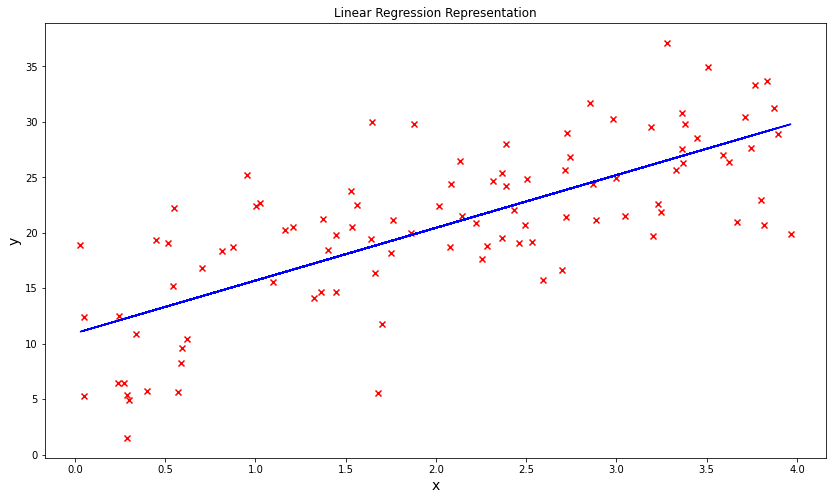

In [169]:
class LeastSquaresRegression():

    # Initialise theta
    def __init__(self):
        self.theta_ = np.zeros((2,1))

    # Define bias column
    def bias_column(self, X):
        X = np.c_[np.ones(len(X)), X]
        return X

    # Fit using the Normal Equation: θ = (XT·X)-1·XT·y
    def fit(self, X_new, y):
        X_transpose = np.transpose(X_new)
        term_1 = np.linalg.inv(np.dot(X_transpose, X_new))
        term_2 = np.dot(X_transpose,y)
        self.theta_ = np.dot(term_1, term_2) 
        return (self.theta_)
    
    # Plot and Print using the theta obtained from previous function
    def predict(self, X, X_new, y):
        plt.scatter(X, y, color = 'red', marker = 'x')
        y = self.theta_[0] + self.theta_[1] * X_new
        print(self.theta_[0], self.theta_[1])
        plt.plot(X_new, y , color='blue')
        plt.show()
        
# Randomly Generated Points 
X =  4 * np.random.rand(100, 1)
y =  10 + 5 * (X + np.random.randn(100, 1)) 

model = LeastSquaresRegression()
X_new = model.bias_column(X)

model.fit(X_new, y)

# Plotting a function 
plt.figure(figsize = (14, 8))
plt.title('Linear Regression Representation')
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)

(model.predict(X, X_new, y))




* We can see that our values are very consistent with the generating equation (coefficients are almost equal to 10 and 5)

* Final computation complexity of a method is O(k^3 + n*k) for a (n,k) matrix.


## Gradient Descent for Linear Regression
While we can use a closed-form solution to calculate coefficients for Linear regression, for problems with large data and/or multiple variables the gradient descent optimization method is used. This saves a significant amount of time and reduces the required computational power.

Below you can see a simple Gradient Descent Optimizer. The following function is used to test optimization algorithm: 

f(x) = 3 + (x - (2  6)T)T · (x - (2  6)T)  (Where T is Transpose)

In [101]:
class GradientDescentOptimizer():

    def __init__(self, f, fprime, start, learning_rate = 0.1):
        self.f_      = f                       # The function
        self.fprime_ = fprime                  # The gradient of f
        self.current_ = start                  # The current point being evaluated
        self.learning_rate_ = learning_rate    # Does this need a comment ?

        # Save history as attributes
        self.history_ = [start]
    
    # Take a gradient descent step
    # 1. Compute the new value and update selt.current_
    # 2. Append the new value to history
    # Does not return anything
    def step(self):        
        new_value = self.current_ - self.learning_rate_ * self.fprime_(self.current_)
        self.current_ = new_value 
        self.history_.append(self.current_)
        
    # Use the gradient descent to get closer to the minimum:
    # For each iteration, take a gradient step
    def optimize(self, iterations = 100):    
        for i in range(iterations):
            self.step()
        return
            
    def print_result(self):
        print("Best theta found is " + str(self.current_))
        print("Value of f at this theta: f(theta) = " + str(self.f_(self.current_)))
        print("Value of f prime at this theta: f'(theta) = " + str(self.fprime_(self.current_)))

# Let's optimize a simple function: f(x) = 3 + (x - (2  6)T)T · (x - (2  6)T). 
def f(x):
    g = np.array([2, 6])
    h = (x - g).T
    u = (x - g)
    return (3 + np.dot(h, u))

def fprime(x):
    h = np.array(([4,12])).T
    return (2*x - h)

grad = GradientDescentOptimizer(f, fprime, np.random.normal(size=(2,)), 0.1)
grad.optimize()
grad.print_result()

Best theta found is [2. 6.]
Value of f at this theta: f(theta) = 3.0
Value of f prime at this theta: f'(theta) = [-1.67432557e-09 -2.09255901e-09]


Now lets plot a 3D function and see progression of Gradient Descent by using history variable defined earlier

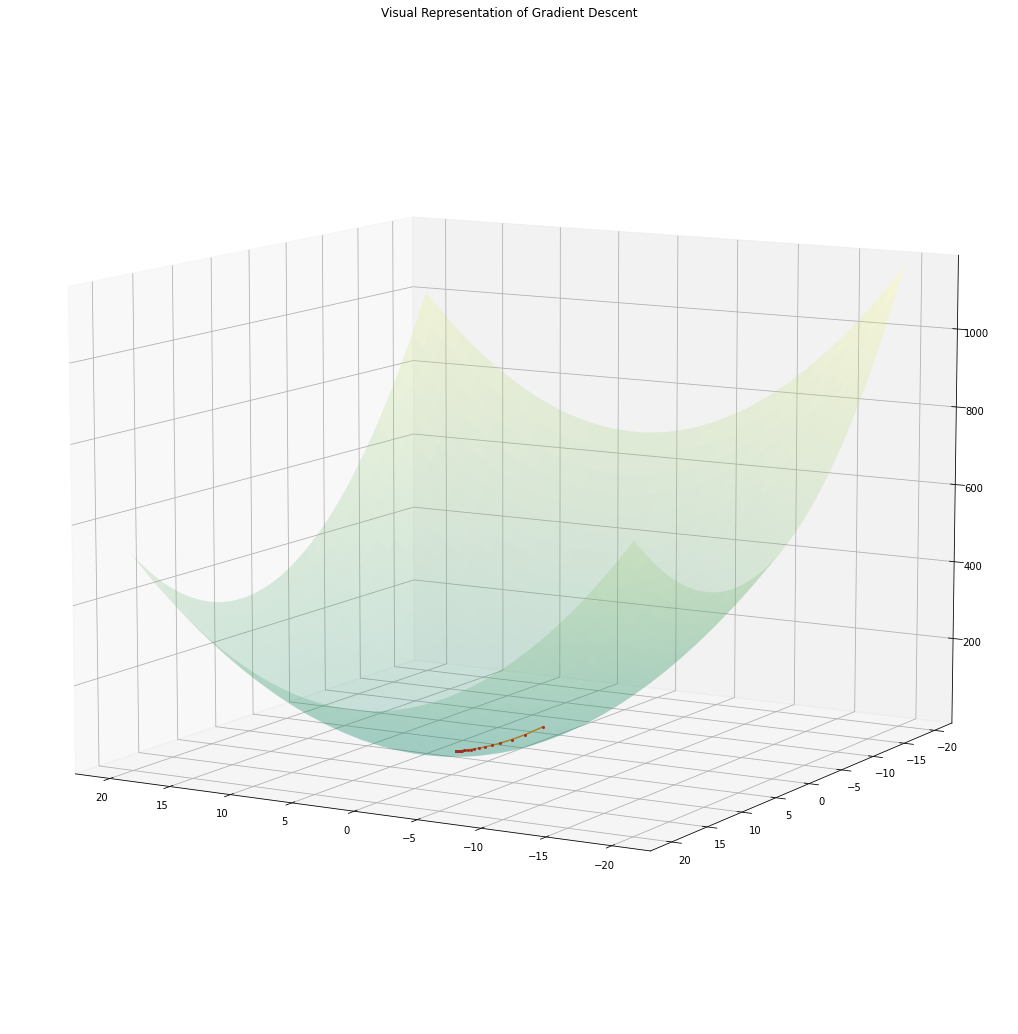

In [103]:
def z(x,y):
    return 4 + (x-2)**2 + (y-6)**2

x = np.linspace(-20, 20, 40)
y = np.linspace(-20, 20, 40)

X, Y = np.meshgrid(x, y)

Z_function = z(X, Y)


plt.figure(figsize = (18, 20))
ax = plt.axes(projection = '3d')

ax.plot_surface(X, Y, Z_function, alpha = 0.2, rstride = 1, cstride = 1, cmap = 'summer')

ax.view_init(10, 120)

ax.plot([t[0] for t in grad.history_], [t[1] for t in grad.history_], [f(t) for t in grad.history_], 
        markerfacecolor='r', markeredgecolor='r', marker='o', markersize=2 );

plt.title('Visual Representation of Gradient Descent');


We can see that Points are slowly converging to a function minimum. Therefore, our gradient descent implementation is correct.

The number of iterations influences precision, while the Learning rate influences how fast the optimum point will be found. Low learning rates lead to slow convergence, but a high learning rate may skip the global/local function minimum



# Batch Gradient Descent for Linear Regression



Now we will implement Batch Gradient Descent on the whole dataset. The **learning rate** is 0.1 and number **iterations** is 100 

Learning Rate = 0.1 and Number of iterations = 100
Theta0:          10.538,
Theta1:          4.294
Final cost/MSE:  94286.386


<Figure size 1008x576 with 0 Axes>

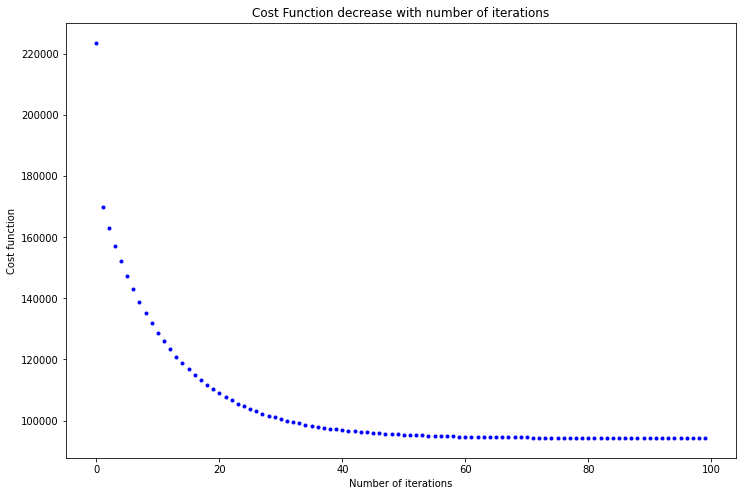

In [161]:
def  cal_cost(theta,m, X,y):    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    
def  cal_cost(theta,m, X,y):    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def gradient_descent(X, m, y, theta_start, learning_rate, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        y_pred = X.dot(theta_start)
        diffMSE = (2/m * np.dot(np.transpose(X) , (y_pred - y)))
        theta_start  = theta_start - learning_rate * diffMSE
        cost_history[i] = cal_cost(theta_start, m, X, y)
    return theta_start, cost_history, y_pred
    
X =  4 * np.random.rand(100, 1)
y =  10 + 5 * (X + np.random.randn(100, 1)) 
X_new = np.c_[np.ones(len(X)), X]
m = len(X)
theta_start = np.random.randn(2,1)
theta, cost, y_pred = gradient_descent(X_new, m, y, theta_start, learning_rate = 0.1, iterations= 100)

print('Learning Rate = 0.1 and Number of iterations = 100')
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost[-1]))

plt.figure(figsize = (14, 8))
fig, ax = plt.subplots(figsize = (12, 8 ))
plt.xlabel('Number of iterations')
plt.ylabel('Cost function')
plt.title('Cost Function decrease with number of iterations')
iteration = 100
ax.plot(range(iteration), cost[0:100], 'b.');

At the start, the cost function decreases with the number of iterations but becomes fairly stagnant when the number of iterations reaches 60 

We can also see how to batch gradient descent fits the regression line to the dataset

Theta0:          8.462,
Theta1:          5.159
Final cost/MSE:  101337.318


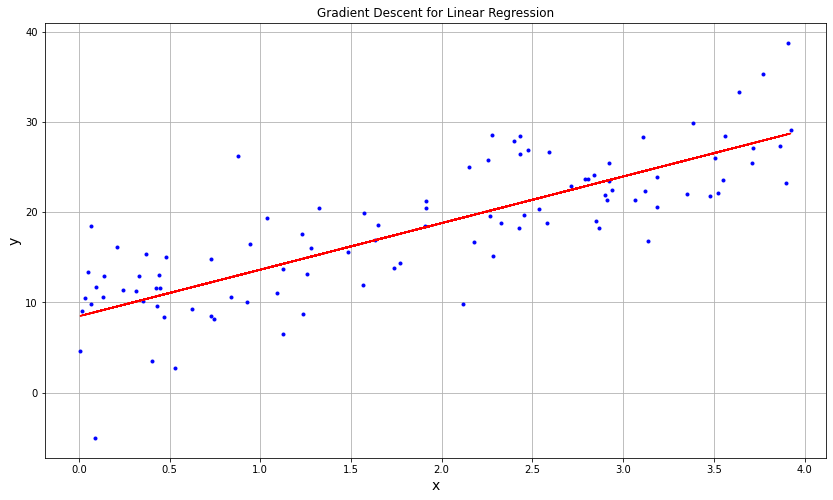

In [145]:
# Learning Rate = 0.05 and Number of Iterations = 100
X =  4 * np.random.rand(100, 1)
y =  10 + 5 * (X + np.random.randn(100, 1)) 
X_new = np.c_[np.ones(len(X)), X]
m = len(X)
theta_start = np.random.randn(2,1)

theta, cost, y_pred = gradient_descent(X_new, m, y, theta_start, learning_rate = 0.05, iterations= 100)

plt.figure(figsize = (14, 8))
plt.title('Gradient Descent for Linear Regression')
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.plot(X, y, "b.")
plt.plot(X, y_pred, "r-")
plt.grid()

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost[-1]))


Picking a suitable Learning Rate and tuning other hyperparameters is extremely important in Machine Learning. We can see below that reducing the learning rate to 0.001 has messed up the regression Line and increased the Final MSE value 

Theta0:          2.519,
Theta1:          6.137
Final cost/MSE:  320457.828


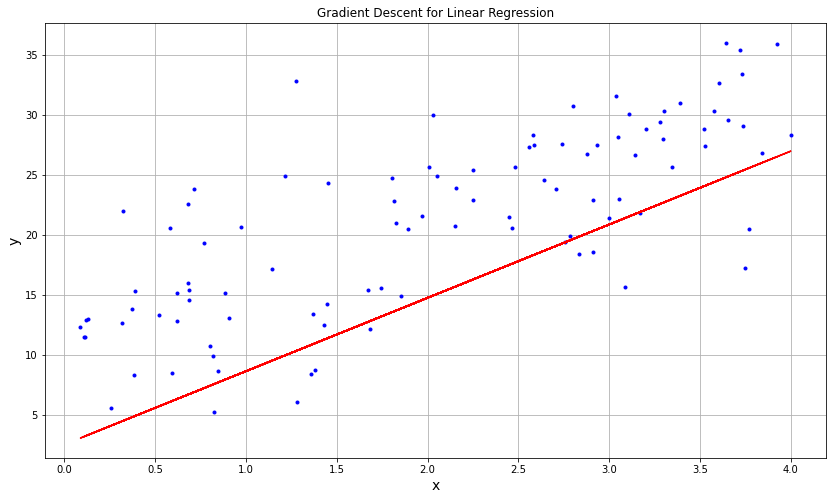

In [152]:
# Learning Rate = 0.01 and Number of Iterations = 100

X =  4 * np.random.rand(100, 1)
y =  10 + 5 * (X + np.random.randn(100, 1)) 
X_new = np.c_[np.ones(len(X)), X]
m = len(X)
theta_start = np.random.randn(2,1)

theta, cost, y_pred = gradient_descent(X_new, m, y, theta_start, learning_rate = 0.001, iterations= 100)

plt.figure(figsize = (14, 8))
plt.title('Gradient Descent for Linear Regression')
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.plot(X, y, "b.")
plt.plot(X, y_pred, "r-")
plt.grid()

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost[-1]))


## Stochastic Gradient Descent (SGD)

Finally, lets implement Stochastic Gradient Descent

In [168]:
def  cal_cost(theta,m, X,y):    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def stocashtic_gradient_descent(X,y,m,theta,learning_rate=0.05,iterations=100):

    cost_history = np.zeros(iterations)
    
    for it in range(iterations):
        cost = 0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            diffMSE = (2/m * np.dot(np.transpose(X_i) , (prediction - y_i)))
            theta  = theta - learning_rate * diffMSE
            cost = cal_cost(theta, m, X, y)
        cost_history[it]  = cost
        
    return theta, cost_history

X =  4 * np.random.rand(100, 1)
y =  10 + 5 * (X + np.random.randn(100, 1)) 
m = len(y)

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,m,theta)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          9.949,
Theta1:          5.076
Final cost/MSE:  106607.666


## Conclusion

* We can see from the theta coefficients that Closed-Form Solution, Batch Gradient Descent and Stochastic Gradient Descent are very similar

* Optimal Learning rate is expected to be 0.05. Selecting other value increases the final MSE value and messes up the regression line  

* Learning rate has a great influence on the cost function. That means we have much more error in matching if we don't set an optimum learning rate. The low learning rate can increase the convergence time, while a high learning rate has a risk of skipping a global/local minimum.

* After iteration number 60, the cost function does not decrease and remains steady. Therefore, we can stop after 60 iterations. The number of required iterations depends on the dataset 
